In [1]:
from deepcrypto.backtest import *
from deepcrypto.portfolio_analysis import *
from deepcrypto.data_utils.crawlers.bitfinex_kaggle import *
from talib.abstract import *
from pprint import pprint

In [2]:
def strategy(df, config):
    k1 = config["k1"] # 50
    k2 = config["k2"] # 5
    k3 = config["k3"] # 200
    k4 = config["k4"] # 20
    
    etl_t1 = df["volume"].rolling(k1).mean().pct_change(k1).pct_change(k3).rolling(k2).min().shift(k1)
    etl_t2 = df["close"].pct_change(k1).pct_change(k2).pct_change(1).shift(k3).diff(k2)
    etl_t3 = (etl_t1 > etl_t2)
    etl = (etl_t3 == 1) & (etl_t3.diff(1) == 1)
    
    cll_t1 = df["open"].diff(k1).ewm(k4).mean().diff(k1).shift(k2)
    cll_t2 = df["high"].rolling(k2).std().ewm(k3).mean().shift(k1)
    cll = cll_t1 < cll_t2
    
    df["close_long"] = cll
    df["enter_long"] = etl
    df["trade_cost"] = 0.001
    df["stop_loss"] = config["stop_loss"]
    df["take_profit"] = config["take_profit"]
    df["time_cut"] = config["time_cut"]
    return df

In [3]:
def backtest_and_report(config, ticker):
    data = read_bitfinex_data("/home/ych/Storage/bitfinex/bitfinex.db", "15T", ticker)
    data = data.backtest.add_defaults()

    order, port = strategy(data, config).backtest()
    pprint(calc_from_order_df(order))
    qs.reports.full(port["portfolio_value"].resample("1D").last(), benchmark=port["open"].resample("1D").last())

In [17]:
DEFAULT_CONFIG = {'time_cut': np.inf,
 'stop_loss': np.inf,
 'take_profit': 0.1,
 'k1': 50,
 'k2': 5,
 'k3': 200,
 'k4': 20}

backtest completed in 0.2474365234375 seconds
{'bothside_avg_holding_bars': 49.5720309205903,
 'bothside_profit_factor': 1.2677868704266695,
 'bothside_total_profit': 32517139.89882019,
 'bothside_total_trades': 1423,
 'bothside_win_rate': 55.79761068165847,
 'buyside_avg_holding_bars': 49.5720309205903,
 'buyside_profit_factor': 1.2677868704266695,
 'buyside_total_profit': 32517139.89882019,
 'buyside_total_trades': 1423,
 'buyside_win_rate': 55.79761068165847,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy     Benchmark
-------------------------  -----------  -----------
Start Period               2016-03-09   2016-03-09
End Period                 2021-05-18   2021-05-18
Risk-Free Rate             0.0%         0.0%
Time in Market             89.0%        97.0%

Cumulative Return          210,353.03%  30,903.68%
CAGR%                      336.26%      201.73%

Sharpe                     2.0          1.3
Sortino                    3.45         2.05
Sortino/√2                 2.44         1.45

Max Drawdown               -49.47%      -93.79%
Longest DD Days            242          1101
Volatility (ann.)          59.91%       89.93%
R^2                        0.44         0.44
Calmar                     6.8          2.15
Skew                       0.58         0.31
Kurtosis                   15.66        6.07

Expected Daily %           0.4%         0.3%
Expected Monthly %         12.91%       9.53%
Expected Yearly %          257.98%      160.16%
Kelly Cri

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2016-06-17,2016-06-19,2017-02-14,242,-49.467183,-47.893473
2,2019-07-09,2019-09-01,2020-02-23,229,-34.480714,-32.870611
3,2018-09-22,2018-11-20,2018-12-23,92,-33.451220,-29.284443
4,2017-06-18,2017-06-30,2017-07-20,32,-30.681668,-30.576653
5,2021-02-21,2021-03-25,2021-05-05,73,-27.368130,-26.776437


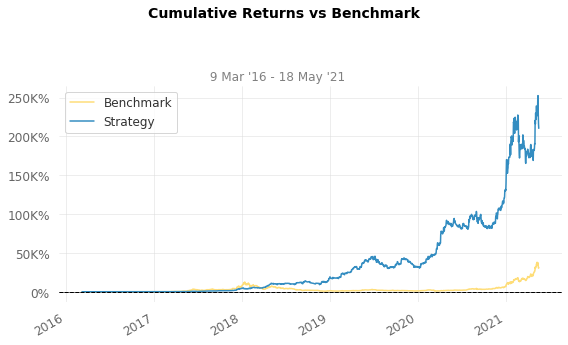

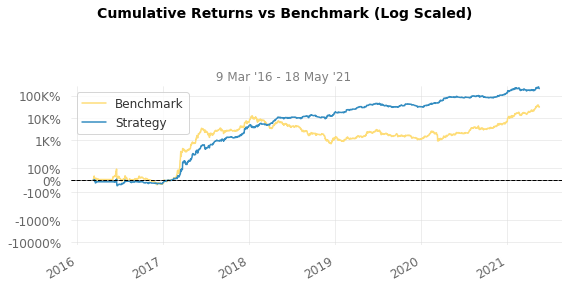

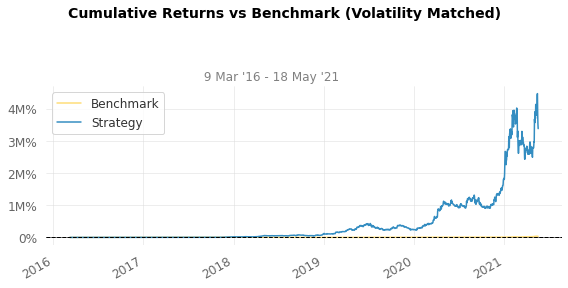

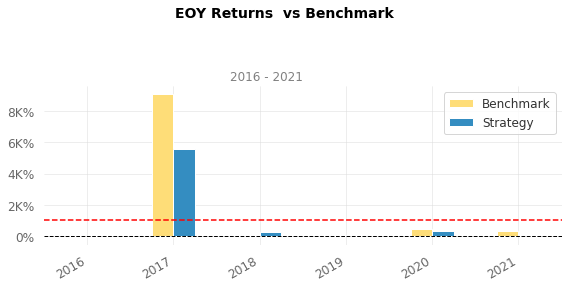

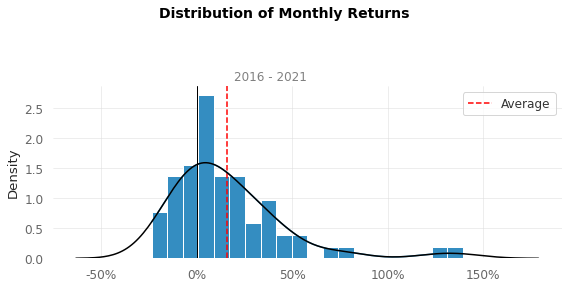

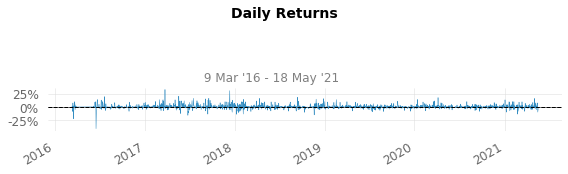

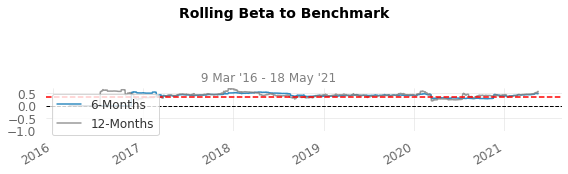

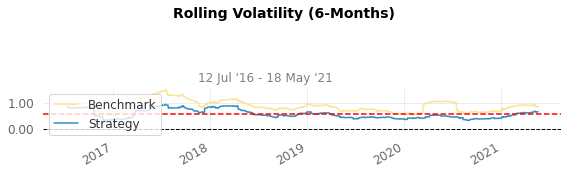

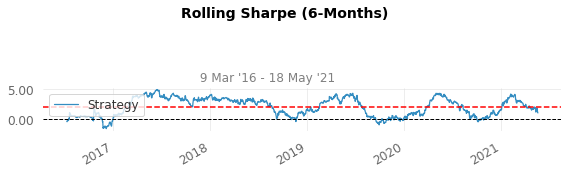

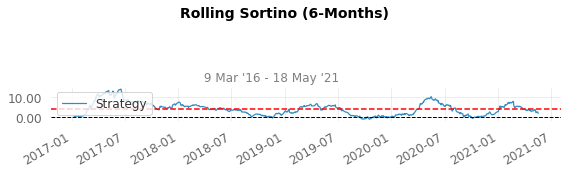

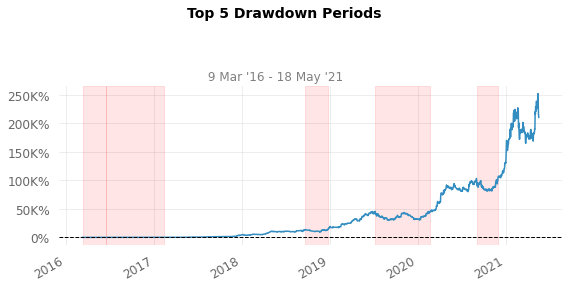

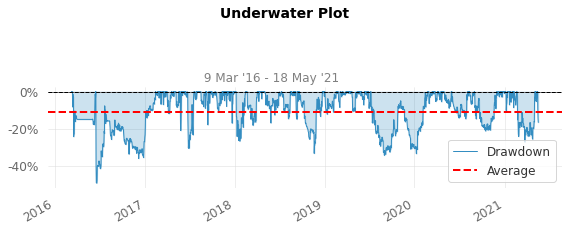

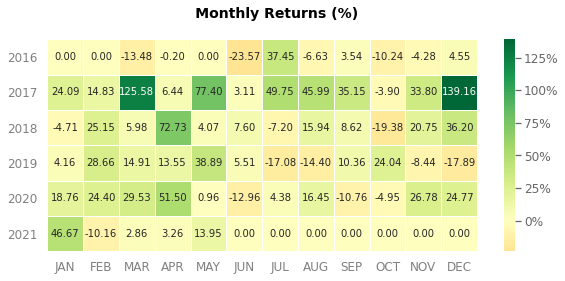

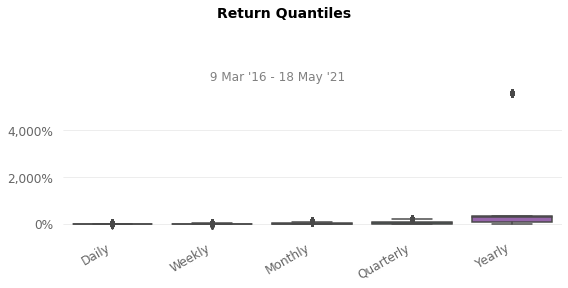

In [18]:
backtest_and_report(DEFAULT_CONFIG, "ETHUSD")

backtest completed in 0.35723233222961426 seconds
{'bothside_avg_holding_bars': 49.89186733303044,
 'bothside_profit_factor': 1.4668629439964955,
 'bothside_total_profit': 26564912.594421957,
 'bothside_total_trades': 2201,
 'bothside_win_rate': 54.42980463425715,
 'buyside_avg_holding_bars': 49.89186733303044,
 'buyside_profit_factor': 1.4668629439964955,
 'buyside_total_profit': 26564912.594421957,
 'buyside_total_trades': 2201,
 'buyside_win_rate': 54.42980463425715,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy     Benchmark
-------------------------  -----------  -----------
Start Period               2013-04-01   2013-04-01
End Period                 2021-05-18   2021-05-18
Risk-Free Rate             0.0%         0.0%
Time in Market             89.0%        96.0%

Cumulative Return          160,577.21%  42,377.85%
CAGR%                      147.82%      110.43%

Sharpe                     1.57         1.08
Sortino                    2.98         1.63
Sortino/√2                 2.11         1.15

Max Drawdown               -51.64%      -84.32%
Longest DD Days            724          1126
Volatility (ann.)          46.4%        71.04%
R^2                        0.34         0.34
Calmar                     2.86         1.31
Skew                       2.52         0.18
Kurtosis                   23.17        10.47

Expected Daily %           0.25%        0.2%
Expected Monthly %         7.82%        6.37%
Expected Yearly %          127.1%       95.89%
Kelly Cr

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2014-07-01,2015-02-05,2016-06-24,724,-51.642763,-50.504741
2,2019-07-09,2019-12-17,2020-03-23,258,-41.387823,-38.975270
3,2013-05-30,2013-09-30,2013-11-19,173,-33.990779,-33.777688
4,2018-01-06,2018-02-05,2018-03-02,55,-32.829008,-31.389128
5,2021-03-14,2021-05-18,2021-05-18,65,-30.415872,-29.399835


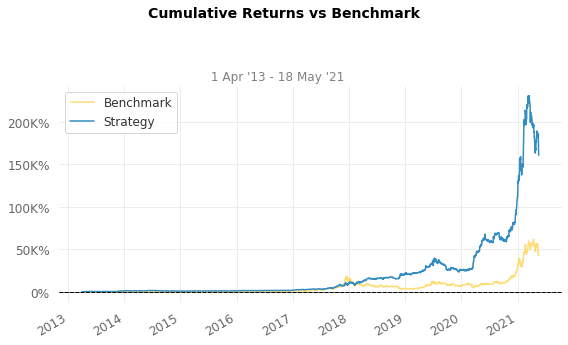

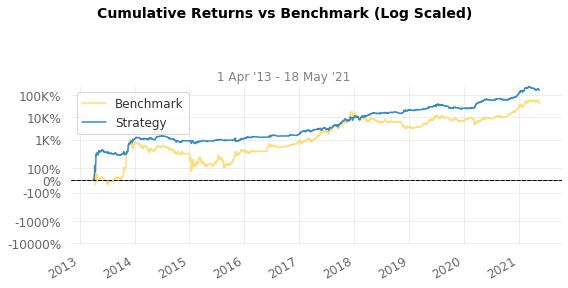

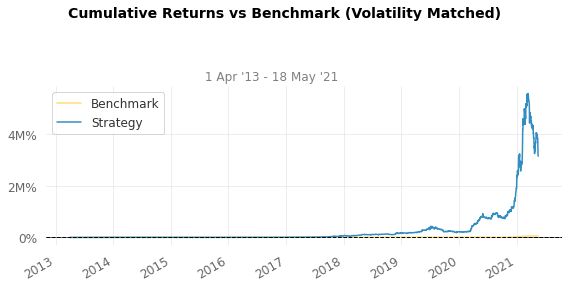

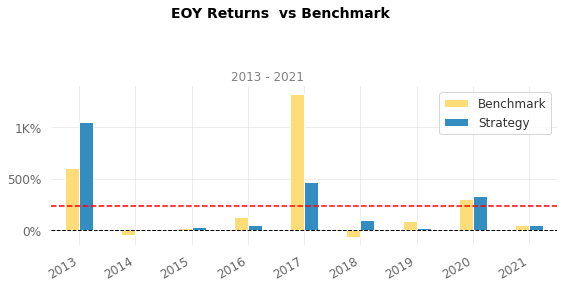

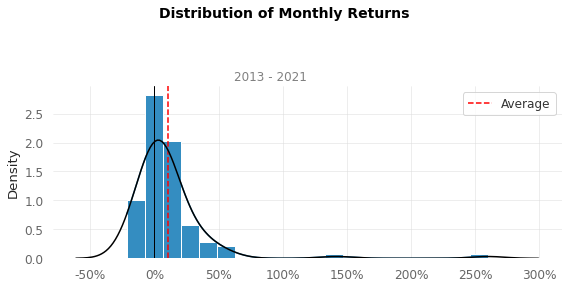

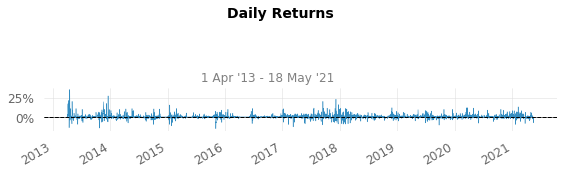

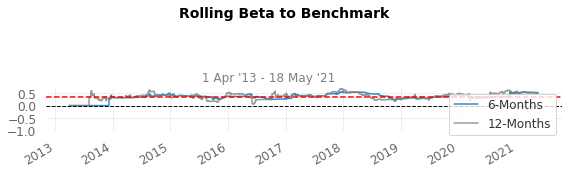

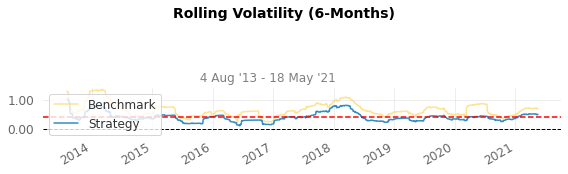

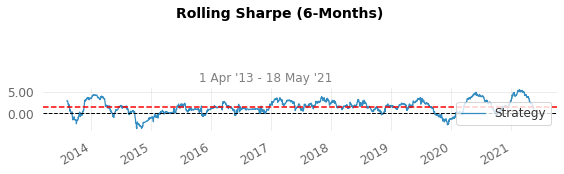

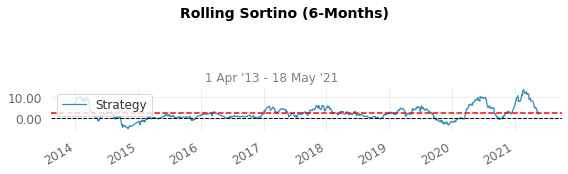

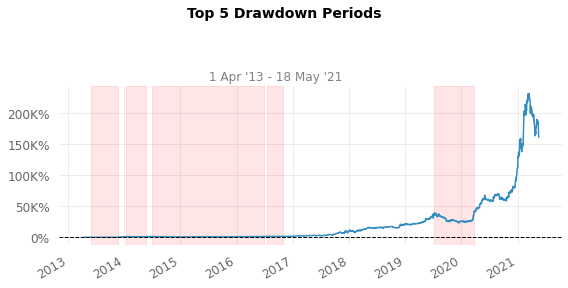

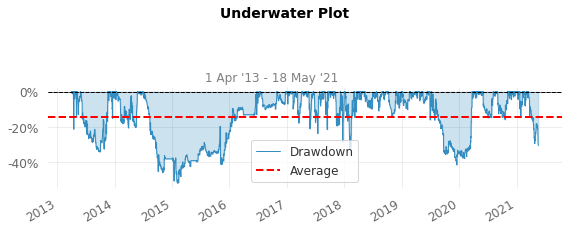

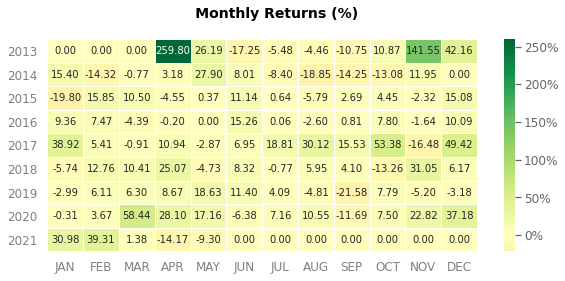

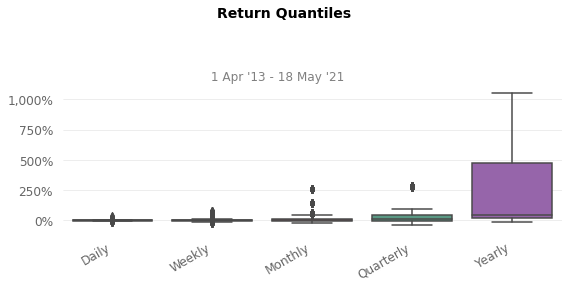

In [6]:
backtest_and_report(DEFAULT_CONFIG, "BTCUSD")

backtest completed in 0.1771860122680664 seconds
{'bothside_avg_holding_bars': 47.096774193548384,
 'bothside_profit_factor': 1.4874768926062745,
 'bothside_total_profit': 6774312.600805664,
 'bothside_total_trades': 1209,
 'bothside_win_rate': 52.77088502894954,
 'buyside_avg_holding_bars': 47.096774193548384,
 'buyside_profit_factor': 1.4874768926062745,
 'buyside_total_profit': 6774312.600805664,
 'buyside_total_trades': 1209,
 'buyside_win_rate': 52.77088502894954,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-05-19  2017-05-19
End Period                 2021-05-18  2021-05-18
Risk-Free Rate             0.0%        0.0%
Time in Market             94.0%       100.0%

Cumulative Return          50,802.64%  404.89%
CAGR%                      374.99%     49.9%

Sharpe                     1.75        0.77
Sortino                    3.74        1.41
Sortino/√2                 2.64        1.0

Max Drawdown               -44.43%     -95.0%
Longest DD Days            556         1226
Volatility (ann.)          77.09%      117.86%
R^2                        0.5         0.5
Calmar                     8.44        0.53
Skew                       3.36        3.04
Kurtosis                   26.81       28.01

Expected Daily %           0.43%       0.11%
Expected Monthly %         13.56%      3.36%
Expected Yearly %          247.81%     38.24%
Kelly Criterion            16.43% 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-05-15,2019-12-17,2020-11-21,556,-44.434006,-43.051291
2,2020-11-29,2021-02-02,2021-03-22,113,-36.273995,-33.658001
3,2017-08-24,2017-09-14,2017-10-05,42,-31.796840,-27.435197
4,2018-01-05,2018-01-11,2018-01-20,15,-29.893506,-26.914087
5,2017-06-25,2017-07-11,2017-08-23,59,-26.733335,-25.920709


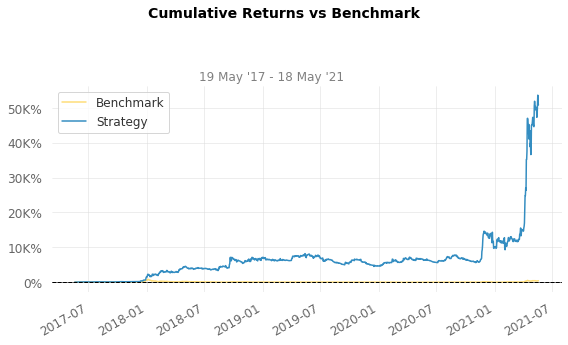

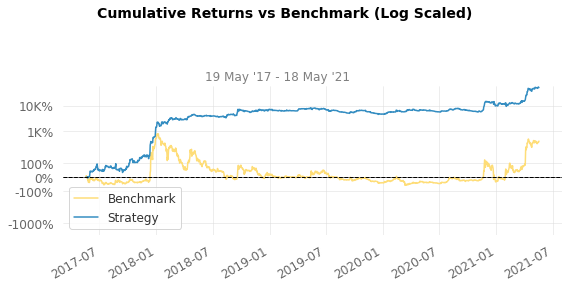

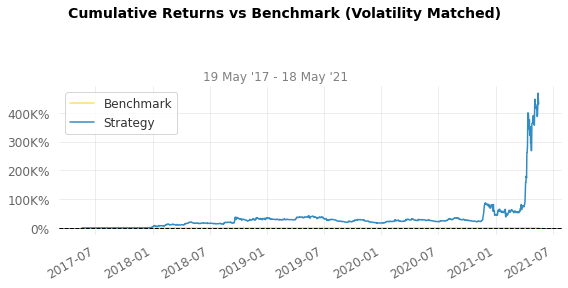

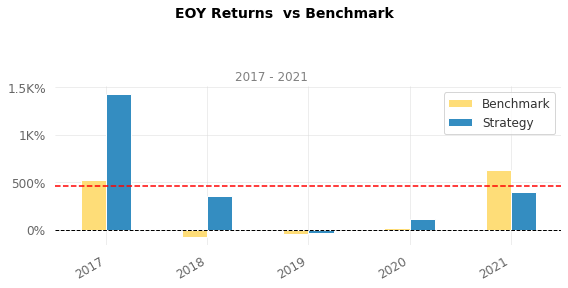

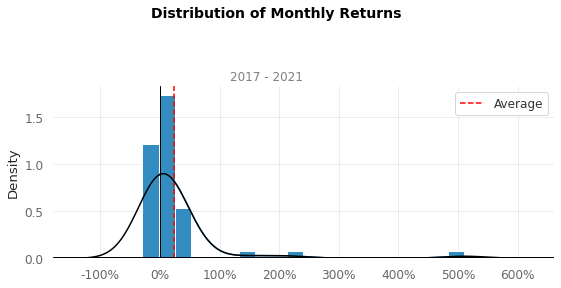

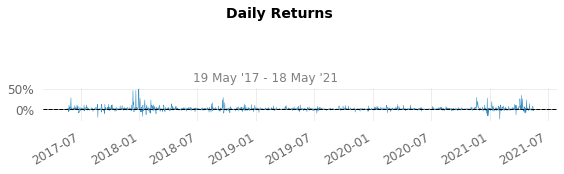

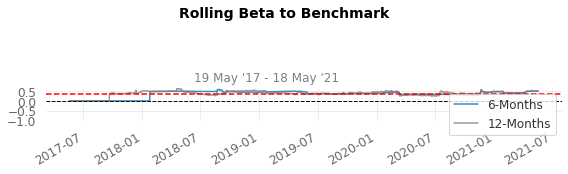

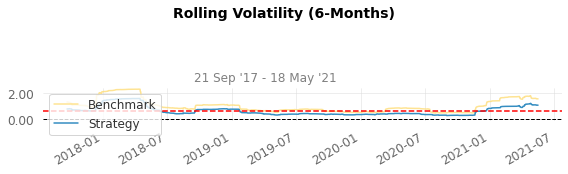

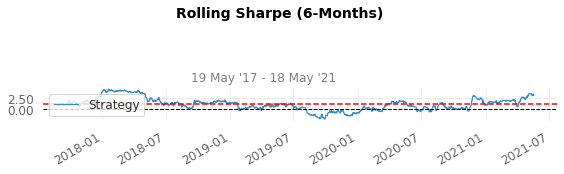

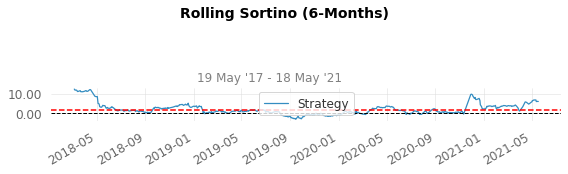

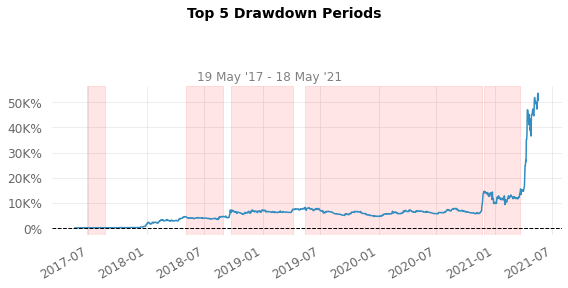

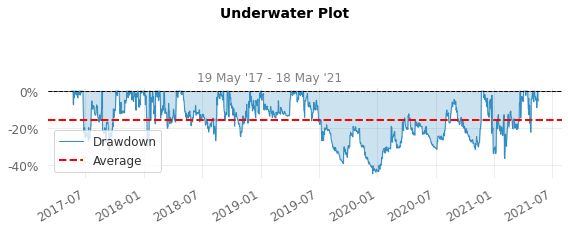

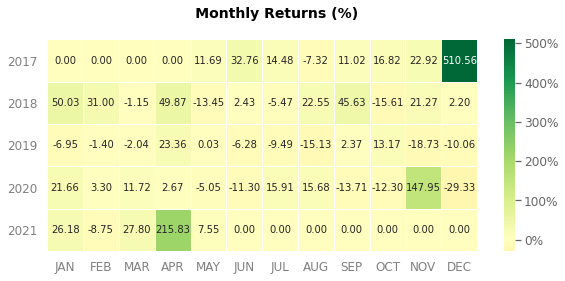

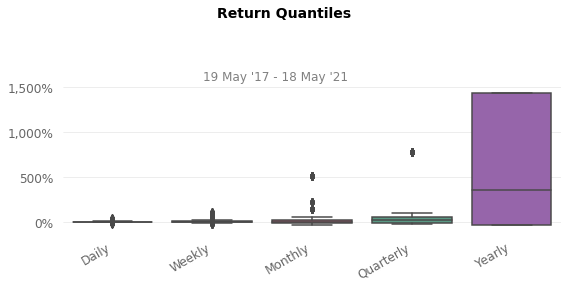

In [7]:
backtest_and_report(DEFAULT_CONFIG, "XRPUSD")

In [8]:
import ray
from ray import tune
def optimizer(config, df):
    df = df.copy()
    order_df, port_df = run_backtest_df(strategy(df, config))
    tune.report(sortino=qs.stats.sortino(port_df["portfolio_value"].resample("1D").last()))

def optimize(df):
    result = tune.run(
        tune.with_parameters(optimizer, df=df),
        config = {
            "time_cut" : tune.grid_search([72, 120, 168, np.inf]),
            "stop_loss" : tune.grid_search([0.1, 0.2, np.inf]),
            "take_profit" : tune.grid_search([0.05, 0.1, 0.2, np.inf]),
            "k1" : tune.grid_search([20, 50, 100]), 
            "k2" : tune.grid_search([5, 10, 20, 50]), 
            "k3" : tune.grid_search([50, 100, 200, 400]), 
            "k4" : tune.grid_search([5, 10, 20, 50])
        },
        local_dir="./ray_results",
    )
    return result

/home/ych/anaconda3/envs/DeepCrypto/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


In [9]:
ray.init()

2021-05-26 11:18:08,842	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8267


{'node_ip_address': '192.168.68.106',
 'raylet_ip_address': '192.168.68.106',
 'redis_address': '192.168.68.106:57976',
 'object_store_address': '/tmp/ray/session_2021-05-26_11-18-07_716726_214069/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-05-26_11-18-07_716726_214069/sockets/raylet',
 'webui_url': '127.0.0.1:8267',
 'session_dir': '/tmp/ray/session_2021-05-26_11-18-07_716726_214069',
 'metrics_export_port': 49766,
 'node_id': '4a707bae9fad33137ed31007fa59d22972699835f72af13f64473b4b'}

In [10]:
data = read_bitfinex_data("/home/ych/Storage/bitfinex/bitfinex.db", "15T", "BTCUSD")
data = data.backtest.add_defaults()

In [11]:
data = data[:int(data.index.__len__() * 0.7)]

In [ ]:
result = optimize(data)

In [14]:
result.get_best_config("sortino", mode="max")

{'time_cut': inf,
 'stop_loss': inf,
 'take_profit': 0.1,
 'k1': 50,
 'k2': 5,
 'k3': 200,
 'k4': 50}